In [1]:
import base64
import pandas as pd
import pyModeS as pms


In [2]:
df = pd.read_csv("test.csv", sep = ";")
df = df.iloc[:, :-1]
df

,ts_kafka,message
0,1734667201534,oAANuYAVzS4ABLg3aB0=
1,1734667201534,kDQjSSgABjG4hW4fTbY=
2,1734667201534,XTxUM/+DTw==
3,1734667201534,kDQjShBRgxXDaCAWeDM=
4,1734667201534,jTRV1fgjAAIASbigrIs=
...,...,...
8354,1734667796655,IAAAALRFCw==
8355,1734667796655,IAAAALRFCw==
8356,1734667796655,jTlkQ5kItjeQCBj8Xms=
8357,1734667796655,IAAGM27mPA==


In [3]:
def encodeHex(b64):
  return base64.b64decode(b64).hex()

df.message = df.message.map(encodeHex)

In [4]:
df

,ts_kafka,message
0,1734667201534,a0000db98015cd2e0004b837681d
1,1734667201534,9034234928000631b8856e1f4db6
2,1734667201534,5d3c5433ff834f
3,1734667201534,9034234a10518315c36820167833
4,1734667201534,8d3455d5f82300020049b8a0ac8b
...,...,...
8354,1734667796655,20000000b4450b
8355,1734667796655,20000000b4450b
8356,1734667796655,8d3964439908b637900818fc5e6b
8357,1734667796655,200006336ee63c


In [5]:
def getDownlink(bits):
  return pms.df(bits)

df['downlink'] = df.message.map(getDownlink)
df

,ts_kafka,message,downlink
0,1734667201534,a0000db98015cd2e0004b837681d,20
1,1734667201534,9034234928000631b8856e1f4db6,18
2,1734667201534,5d3c5433ff834f,11
3,1734667201534,9034234a10518315c36820167833,18
4,1734667201534,8d3455d5f82300020049b8a0ac8b,17
...,...,...,...
8354,1734667796655,20000000b4450b,4
8355,1734667796655,20000000b4450b,4
8356,1734667796655,8d3964439908b637900818fc5e6b,17
8357,1734667796655,200006336ee63c,4


In [6]:
df_17_18 = df[(df.downlink == 17) | (df.downlink == 18)]
df_17_18 = df_17_18.reset_index(drop=True)
(df_17_18["downlink"] == 18).sum()

np.int64(1189)

In [7]:
df_17_18

,ts_kafka,message,downlink
0,1734667201534,9034234928000631b8856e1f4db6,18
1,1734667201534,9034234a10518315c36820167833,18
2,1734667201534,8d3455d5f82300020049b8a0ac8b,17
3,1734667201534,9034234a280006290c82bf17280b,18
4,1734667201534,9034234b10518315c37820887a11,18
...,...,...,...
3589,1734667796146,8dabd33699113aa1584c12e97f4a,17
3590,1734667796655,9034234b2800061f0a8c5dd3b23a,18
3591,1734667796655,913440d7434dfe2ad27e9d4d0376,18
3592,1734667796655,8d3964439908b637900818fc5e6b,17


In [8]:
def encodeTC(hex):
  return pms.bin2int(pms.hex2bin(hex)[32:37])

df_17_18['TC'] = df_17_18.message.map(encodeTC)

df_17_18

,ts_kafka,message,downlink,TC
0,1734667201534,9034234928000631b8856e1f4db6,18,5
1,1734667201534,9034234a10518315c36820167833,18,2
2,1734667201534,8d3455d5f82300020049b8a0ac8b,17,31
3,1734667201534,9034234a280006290c82bf17280b,18,5
4,1734667201534,9034234b10518315c37820887a11,18,2
...,...,...,...,...
3589,1734667796146,8dabd33699113aa1584c12e97f4a,17,19
3590,1734667796655,9034234b2800061f0a8c5dd3b23a,18,5
3591,1734667796655,913440d7434dfe2ad27e9d4d0376,18,8
3592,1734667796655,8d3964439908b637900818fc5e6b,17,19


In [9]:
df_17_18_id = df_17_18[(df_17_18["TC"] < 5) & (df_17_18["TC"] > 0)]
df_17_18_id["TC"].unique()

array([2, 4])

In [10]:
# def encodeBin(hex):
#   return pms.hex2bin(hex)

# df_17_18_id["binmssg"] = df_17_18_id.message.map(encodeBin)
# df_17_18_id

In [11]:
def getcallsign(hex):
  return pms.decoder.adsb.callsign(hex)
df_17_18_id["callsign"] = df_17_18_id.message.map(getcallsign)
df_17_18_id

/var/folders/d9/w858q_3s5xj1lvw2flnmb_jr0000gn/T/ipykernel_2650/2331328478.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_17_18_id["callsign"] = df_17_18_id.message.map(getcallsign)


,ts_kafka,message,downlink,TC,callsign
1,1734667201534,9034234a10518315c36820167833,18,2,TXLU06__
4,1734667201534,9034234b10518315c37820887a11,18,2,TXLU07__
11,1734667201534,9034234d10518315c39820ca8eeb,18,2,TXLU09__
18,1734667201534,9134235812512d3282082079181f,18,2,TR42____
21,1734667201736,9034234f10518315c71820f97b8f,18,2,TXLU11__
...,...,...,...,...,...
3569,1734667795441,9034234910518315c358204b8a5c,18,2,TXLU05__
3573,1734667795441,9034234a10518315c36820167833,18,2,TXLU06__
3576,1734667795441,9034234b10518315c37820887a11,18,2,TXLU07__
3579,1734667796146,8c34411512df7df76100716f5bf4,17,2,7777XPA1


In [11]:
lista_uniques_callsign = list(df_17_18_id["callsign"].unique())
lista_uniques_callsign

['TXLU06__',
 'TXLU07__',
 'TXLU09__',
 'TR42____',
 'TXLU11__',
 'TXLU12__',
 'ARG1134_',
 'TXLU01__',
 'TXLU02__',
 'TXLU04__',
 'TXLU05__',
 'AAL748__',
 'TXLU03__',
 'HIELO21_',
 'BCS41E__',
 'TXLU00__',
 'TXLU10__',
 'SWT180__',
 'AFR593__',
 'IBE0102_',
 'IBE0118_',
 'IBE0156_',
 'IBE0348_',
 'HIELO24_',
 'EDW101__',
 'P19_____',
 'HIELO23_',
 'TR11____',
 'SZN403__',
 'IBE0170_',
 'AMX034__',
 '7777XPA1',
 'P13_____',
 'TR40____']

In [12]:
def getcategory(hex):
  return pms.decoder.adsb.category(hex)
df_17_18_id["CAT"] = df_17_18_id.message.map(getcategory)
df_17_18_id = df_17_18_id.reset_index(drop=True)
df_17_18_id

/var/folders/d9/w858q_3s5xj1lvw2flnmb_jr0000gn/T/ipykernel_2650/1995209403.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_17_18_id["CAT"] = df_17_18_id.message.map(getcategory)


,ts_kafka,message,downlink,TC,callsign,CAT
0,1734667201534,9034234a10518315c36820167833,18,2,TXLU06__,0
1,1734667201534,9034234b10518315c37820887a11,18,2,TXLU07__,0
2,1734667201534,9034234d10518315c39820ca8eeb,18,2,TXLU09__,0
3,1734667201534,9134235812512d3282082079181f,18,2,TR42____,2
4,1734667201736,9034234f10518315c71820f97b8f,18,2,TXLU11__,0
...,...,...,...,...,...,...
622,1734667795441,9034234910518315c358204b8a5c,18,2,TXLU05__,0
623,1734667795441,9034234a10518315c36820167833,18,2,TXLU06__,0
624,1734667795441,9034234b10518315c37820887a11,18,2,TXLU07__,0
625,1734667796146,8c34411512df7df76100716f5bf4,17,2,7777XPA1,2


In [13]:
vortexDict = {
    2:{
        0:"No category information",
        1:"Surface emergency vehicle",
        2: "ERROR",
        3: "Surface service vehicle",
        4:"Ground obstruction",
        5:"Ground obstruction",
        6:"Ground obstruction",
        7:"Ground obstruction"
    },
    4:{
        0:"No category information",
        1:"Light (less than 7000 kg)",
        2:"Medium 1 (between 7000 kg and 34000 kg)",
        3:"Medium 2 (between 34000 kg to 136000 kg)",
        4:"High vortex aircraft",
        5:"Heavy (larger than 136000 kg)",
        6:"High performance (>5 g acceleration) and high speed (>400 kt)",
        7:"Rotorcraft"
    }
}

In [14]:
df_prueba = df_17_18_id[(df_17_18_id["TC"] == 2) | (df_17_18_id["TC"] == 4)]
df_prueba

,ts_kafka,message,downlink,TC,callsign,CAT
0,1734667201534,9034234a10518315c36820167833,18,2,TXLU06__,0
1,1734667201534,9034234b10518315c37820887a11,18,2,TXLU07__,0
2,1734667201534,9034234d10518315c39820ca8eeb,18,2,TXLU09__,0
3,1734667201534,9134235812512d3282082079181f,18,2,TR42____,2
4,1734667201736,9034234f10518315c71820f97b8f,18,2,TXLU11__,0
...,...,...,...,...,...,...
622,1734667795441,9034234910518315c358204b8a5c,18,2,TXLU05__,0
623,1734667795441,9034234a10518315c36820167833,18,2,TXLU06__,0
624,1734667795441,9034234b10518315c37820887a11,18,2,TXLU07__,0
625,1734667796146,8c34411512df7df76100716f5bf4,17,2,7777XPA1,2


In [15]:
# tc_1 = df_17_18_id["TC"][0]
# cat_1 = df_17_18_id["CAT"][0]
# vortexDict[tc_1][cat_1]

In [16]:
def valor_vortex(fila):
    tc = fila["TC"]  # Obtenemos el valor de TC de la fila actual
    cat = fila["CAT"]  # Obtenemos el valor de CAT de la fila actual
    return vortexDict[tc][cat]  # Devolvemos el valor de vortexDict para esos valores

# Aplicamos la función a cada fila del DataFrame y creamos una nueva columna
df_prueba["vortex"] = df_prueba.apply(valor_vortex, axis=1)
df_prueba

,ts_kafka,message,downlink,TC,callsign,CAT,vortex
0,1734667201534,9034234a10518315c36820167833,18,2,TXLU06__,0,No category information
1,1734667201534,9034234b10518315c37820887a11,18,2,TXLU07__,0,No category information
2,1734667201534,9034234d10518315c39820ca8eeb,18,2,TXLU09__,0,No category information
3,1734667201534,9134235812512d3282082079181f,18,2,TR42____,2,ERROR
4,1734667201736,9034234f10518315c71820f97b8f,18,2,TXLU11__,0,No category information
...,...,...,...,...,...,...,...
622,1734667795441,9034234910518315c358204b8a5c,18,2,TXLU05__,0,No category information
623,1734667795441,9034234a10518315c36820167833,18,2,TXLU06__,0,No category information
624,1734667795441,9034234b10518315c37820887a11,18,2,TXLU07__,0,No category information
625,1734667796146,8c34411512df7df76100716f5bf4,17,2,7777XPA1,2,ERROR


In [17]:
df_prueba[df_prueba["callsign"] == "IBE0156_"]

,ts_kafka,message,downlink,TC,callsign,CAT,vortex
97,1734667296207,8d34628d25242170c75da09ed0ac,17,4,IBE0156_,5,Heavy (larger than 136000 kg)
234,1734667435685,8d34628d25242170c75da09ed0ac,17,4,IBE0156_,5,Heavy (larger than 136000 kg)
353,1734667545138,8d34628d25242170c75da09ed0ac,17,4,IBE0156_,5,Heavy (larger than 136000 kg)
461,1734667645037,8d34628d25242170c75da09ed0ac,17,4,IBE0156_,5,Heavy (larger than 136000 kg)


QUITAR MENSAJES IGUALES, LA IDENTIFICACION ES EL MISMO MENSAJE

Pruebas
-

     |
     |
     |
     |
    \|/
     V

In [18]:
primerbase64 = df["message"][4]

In [19]:
primerhex = base64.b64decode(primerbase64).hex()
primerhex = "8D4840D6202CC371C32CE0576098"

In [20]:
nueveal22 = primerhex[9:23]
nueveal22

'02CC371C32CE05'

In [21]:
primerbinario = pms.hex2bin(primerhex)

In [22]:
primerbinario[:5]

'10001'

In [23]:
primerbinario

'1000110101001000010000001101011000100000001011001100001101110001110000110010110011100000010101110110000010011000'

In [24]:
TC = primerbinario[32:37]

In [25]:
TC

'00100'

In [26]:
pms.tell(primerhex)

                     Message: 8D4840D6202CC371C32CE0576098 
                ICAO address: 4840D6 
             Downlink Format: 17 
                    Protocol: Mode-S Extended Squitter (ADS-B) 
                        Type: Identification and category 
                   Callsign:: KLM1023_ 


In [27]:
pms.bin2int(TC)

4

In [28]:
primerbase64

'8d3455d5f82300020049b8a0ac8b'

In [29]:
pms.df(primerhex)

17

In [30]:
z = pms.decoder.bds.bds50.trk50(primerhex)
z

## Airbone velocity

<Axes: xlabel='TC'>

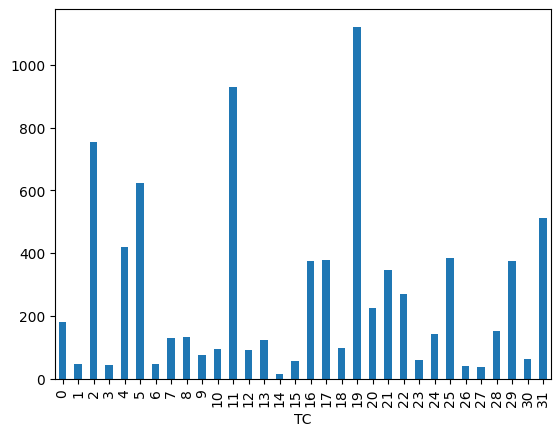

In [39]:
df["TC"].value_counts().sort_index().plot(kind="bar")

In [44]:
df["TC"] = df.message.map(encodeTC)
df_vel = df[df["TC"] == 19]
df_vel = df_vel[df_vel["downlink"] == 17] # segun referencias, se necesita downlink 17
df_vel

,ts_kafka,message,downlink,TC
11,1734667201534,8d4b18f599092428f80809ca6914,17,19
18,1734667201534,8d34628d9912048c3004122e652a,17,19
26,1734667201534,8d34754d991201065878123edcf3,17,19
28,1734667201534,8daa5f419909189df8701c665d19,17,19
32,1734667201534,5e3423549880dd,11,19
...,...,...,...,...
8338,1734667796146,8d34754d99113b03584418835661,17,19
8339,1734667796146,a00013909d54eab0aa0000a2fd38,20,19
8344,1734667796146,5d3455d59a4cfa,11,19
8346,1734667796146,8dabd33699113aa1584c12e97f4a,17,19


In [43]:
def get_subtype(hex):
    return pms.bin2int(pms.hex2bin(hex)[37:40])
## ST stands for subtype
df_vel["ST"] = df_vel.message.map(get_subtype)
df_vel["ST"].unique() ## 0,4,6,7 shouldn't be there (only 0,1,2,3)


array([1])

In [49]:
def get_intent_change_flag(hex):
    return pms.bin2int(pms.hex2bin(hex)[40])

df_vel["IC"] = df_vel.message.map(get_intent_change_flag)

/var/folders/kf/v4wgzcdn2k5_yn3_h219svlm0000gn/T/ipykernel_5074/1932264956.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vel["IC"] = df_vel.message.map(get_intent_change_flag)


In [50]:
## Instrument Flight Rules Capability Flag 
def get_ifr_capability_flag(hex):
    return pms.bin2int(pms.hex2bin(hex)[41])
df_vel["IFR"] = df_vel.message.map(get_ifr_capability_flag)

/var/folders/kf/v4wgzcdn2k5_yn3_h219svlm0000gn/T/ipykernel_5074/1516308521.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vel["IFR"] = df_vel.message.map(get_ifr_capability_flag)


In [51]:
## Navigation Uncertainty Category for velocity
def get_navigation_uncertainty_category(hex):
     return pms.bin2int(pms.hex2bin(hex)[42:45])
df_vel["NUC"] = df_vel.message.map(get_navigation_uncertainty_category)

/var/folders/kf/v4wgzcdn2k5_yn3_h219svlm0000gn/T/ipykernel_5074/4267185400.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vel["NUC"] = df_vel.message.map(get_navigation_uncertainty_category)


In [ ]:
## dataframe for each subtype
df_vel_sb_1_2 = df_vel[(df_vel["ST"] == 1) | (df_vel["ST"] == 2)]
df_vel_sb_3_4 = df_vel[(df_vel["ST"] == 3) | (df_vel["ST"] == 4)]

In [60]:
def get_direction_east_west(hex):
     return pms.bin2int(pms.hex2bin(hex)[45])
df_vel_sb_1_2["Dew"] = df_vel_sb_1_2.message.map(get_direction_east_west) 
df_vel_sb_1_2["Dew"]

/var/folders/kf/v4wgzcdn2k5_yn3_h219svlm0000gn/T/ipykernel_5074/995886411.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vel_sb_1_2["Dew"] = df_vel_sb_1_2.message.map(get_direction_east_west)


array([0, 1])

In [121]:
def get_east_west_velocity(hex):
     return pms.bin2int(pms.hex2bin(hex)[46:56])

df_vel_sb_1_2["Vew"] = df_vel_sb_1_2["message"].map(get_east_west_velocity)

df_vel_sb_1_2.loc[(df_vel_sb_1_2["ST"] == 1) & (df_vel_sb_1_2["Vew"] != 0), "Vew"] -= 1

df_vel_sb_1_2.loc[(df_vel_sb_1_2["ST"] == 2) & (df_vel_sb_1_2["Vew"] != 0), "Vew"] = 4 * (df_vel_sb_1_2.loc[(df_vel_sb_1_2["ST"] == 2) & (df_vel_sb_1_2["Vew"] != 0), "Vew"] - 1)


/var/folders/kf/v4wgzcdn2k5_yn3_h219svlm0000gn/T/ipykernel_5074/4088688855.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vel_sb_1_2["Vew"] = df_vel_sb_1_2["message"].map(get_east_west_velocity)


In [123]:
def direction_north_south(hex):
    try:
        return pms.bin2int(pms.hex2bin(hex)[56])
    
    except IndexError:
        print("failed to decoded",len(pms.hex2bin(hex)))
        return None
## Some messages have a different format, less than 57 bits
df_vel_sb_1_2["Dns"] = df_vel_sb_1_2.message.map(direction_north_south)
    

failed to decoded 56
failed to decoded 56
failed to decoded 56
failed to decoded 56
failed to decoded 56
failed to decoded 56
failed to decoded 56
failed to decoded 56
failed to decoded 56
failed to decoded 56
failed to decoded 56
failed to decoded 56
failed to decoded 56
failed to decoded 56
failed to decoded 56
failed to decoded 56
failed to decoded 56
failed to decoded 56
failed to decoded 56
failed to decoded 56
failed to decoded 56
failed to decoded 56
failed to decoded 56
failed to decoded 56
failed to decoded 56
failed to decoded 56
failed to decoded 56
failed to decoded 56
failed to decoded 56
failed to decoded 56
failed to decoded 56
failed to decoded 56
failed to decoded 56
failed to decoded 56
failed to decoded 56
failed to decoded 56
failed to decoded 56
failed to decoded 56
failed to decoded 56
failed to decoded 56
failed to decoded 56
failed to decoded 56
failed to decoded 56
failed to decoded 56
failed to decoded 56
failed to decoded 56
failed to decoded 56
failed to dec

/var/folders/kf/v4wgzcdn2k5_yn3_h219svlm0000gn/T/ipykernel_5074/4137013574.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vel_sb_1_2["Dns"] = df_vel_sb_1_2.message.map(direction_north_south)


In [124]:
def get_east_west_velocity(hex):
     try:
          return pms.bin2int(pms.hex2bin(hex)[57:67])
     except:
          return 0 ## no information available

df_vel_sb_1_2["Vns"] = df_vel_sb_1_2.message.map(get_east_west_velocity)
df_vel_sb_1_2.loc[(df_vel_sb_1_2["ST"] == 1) & (df_vel_sb_1_2["Vns"] != 0), "Vns"] -= 1
df_vel_sb_1_2.loc[(df_vel_sb_1_2["ST"] == 2) & (df_vel_sb_1_2["Vns"] != 0), "Vns"] = 4 * (df_vel_sb_1_2.loc[(df_vel_sb_1_2["ST"] == 2) & (df_vel_sb_1_2["Vns"] != 0), "Vns"] - 1)


/var/folders/kf/v4wgzcdn2k5_yn3_h219svlm0000gn/T/ipykernel_5074/2915748199.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vel_sb_1_2["Vns"] = df_vel_sb_1_2.message.map(get_east_west_velocity)
